<a href="https://colab.research.google.com/github/eya-abid/ExData_Plotting1/blob/master/Workshop_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center> Titanic - Data Preprocessing and Visualization </center>**

---

> + ***What is Data Preprocessing ?***
+ ***Why Data Preprocessing ?***
+ ***Major Tasks in Data Preprocessing***
+ ***Exploratory Data Analysis (EDA)***
+ ***Handling Missing Data***
+ ***Dealing with Categorical Values***
+ ***Rescaling***
+ ***Data Spliting***

## 1.   What is Data Preprocessing ?



Data preprocessing is a data mining technique that involves transforming **raw data** into an understandable format. 

## 2. Why Data Preprocessing ?

Data in the real world is dirty:
- **incomplete**: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
- **noisy**: containing errors or outliers
- **inconsistent**: containing discrepancies in codes or names

No quality data, no quality mining results:
- Quality decisions must be based on quality data
- Data warehouse needs consistent integration of quality data

## 3. Major Tasks in Data Preprocessing
- **Data cleaning**
 + Fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies
- **Data integration**
 - Integration of multiple databases, data cubes, files, or notes
- **Data transformation**
 - Normalization (scaling to a specific range)

Let's take a sample dataset for this exercise.


>*The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.*

>*One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.*

<img src="titanic.png">

In this workshop, we ask you to complete the analysis of what sorts of people were likely to survive. 
In particular, we ask you to apply the data preprocessing steps to clean the Titanic dataset and make it ready for machine learning training.



In [ ]:

###############################################################
#       Step 1 : Importing the libraries                      #
###############################################################


# NumPy is module for Python. The name is an acronym for "Numeric Python" or "Numerical Python".
# This makes sure that the precompiled mathematical and numerical functions 
# and functionalities of Numpy guarantee great execution speed.

import numpy as np

# Pandas is an open-source Python Library providing high-performance data manipulation 
# and analysis tool using its powerful data structures. 
# The name Pandas is derived from the word Panel Data – an Econometrics from Multidimensional data.

import pandas as pd

#Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety
#of hardcopy formats and interactive environments across platforms.

import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics.

import seaborn as sns


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

# %matplotlib inline

In [ ]:
###############################################################
#       Step 2 : Importing the Dataset                        #
###############################################################

#Read the 'titanic.csv' and store it in the variable "dataset".
dataset =pd.read_csv("titanic.csv")
print('Load the datasets...')


# Print the shape of the dataset
print ('dataset: %s'%(str(dataset.shape)))


Load the datasets...
dataset: (891, 12)


The dataset contains 891 rows and 12 columns

In [ ]:
# print the dataset
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Use the DataFrame .describe() method to check out summary statistics of numeric columns (of dataset).
dataset.describe()


,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,864.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.304175
std,257.353842,0.486592,14.526497,1.102743,0.806057,50.304046
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.427100
75%,668.500000,1.000000,38.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## 4. Exploratory Data Analysis (EDA)

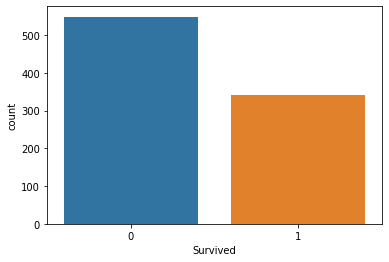

In [ ]:
#Use seaborn to build a bar plot of Titanic survival (your target variable
sns.countplot(data=dataset,x="Survived")

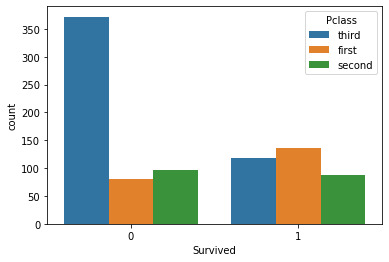

In [ ]:
#Use seaborn to build bar plots to figure out which class has the most survivors.
sns.countplot(data=dataset,x="Survived",hue="Pclass")

In [ ]:
# Use pandas to figure out how many women and how many men survived.
dataset.loc[dataset.Survived==1].groupby('Pclass').Survived.count()

Pclass
first     136
second     87
third     119
Name: Survived, dtype: int64

In [ ]:
# Use pandas to figure out the proportion of women that survived, along with the proportion of men:
print(dataset[dataset.Sex == 'female'].Survived.sum()/dataset[dataset.Sex == 'female'].Survived.count())
print(dataset[dataset.Sex == 'male'].Survived.sum()/dataset[dataset.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


233 of women survived, while 109 of men survived.

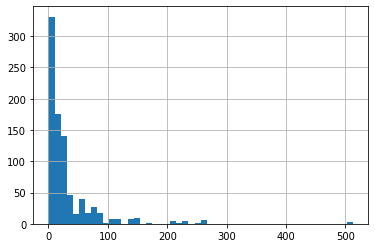

In [ ]:
# plot a histogram of the 'Fare' column.
dataset.Fare.hist(bins=50)

Text(0, 0.5, 'Frequency')

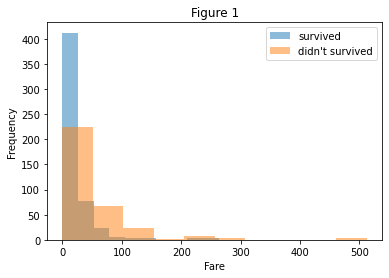

In [ ]:
#Use a pandas plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.
dataset.Fare.groupby(dataset.Survived).plot(kind='hist',alpha=0.5)
# Set a title for the figure
plt.title("Figure 1")
# Give your figure a legend
plt.legend(["survived", "didn't survived"])
plt.xlabel("Fare")
plt.ylabel("Frequency")

## 5. Handling Missing Data

In [ ]:
# Use the DataFrame .info() method to check out datatypes, missing values and more (of dataset).
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         864 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


There are 2 numerical variables that have missing values: what are they?

The concept of missing values is important to understand in order to successfully manage data. If the missing values are not handled properly, then we may end up drawing an inaccurate inference about the data.

In [ ]:
# Check for the missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            27
Cabin          687
Embarked         2
dtype: int64

### **Two ways to handle Missing Values**
**1. Deleting Rows:** 
    
    This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 75% of missing values. This method is advised only when there are enough samples in the data set. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

In [ ]:
# Drop NAN values from dataset and save it to a new Dataframe 'dataset_1'
dataset_1=dataset.dropna()
# recheck the missing values
dataset_1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# Print the shape of the new Dataframe 'dataset_1'
dataset_1.shape

(179, 12)

In [ ]:
# Drop the column 'Cabin' since this column has 687 missing values out of 891.
dataset.drop('Cabin',axis=1,inplace=True)

In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**2. Replacing With Mean/Median/Mode:**

    This strategy can be applied on a feature which has numeric data like the age of a person.
    We can calculate the mean, median or mode of the feature and replace it with the missing values.
    The loss of the data can be negated by this method which yields better results compared to removal of rows and
    columns.
    Replacing with the above three approximations are a statistical approach of handling the missing values.

In [ ]:
# Replace the NaN value in each column with mean, media, or mode
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
dataset.Fare.fillna(dataset.Fare.mean(),inplace=True)
# recheck the missing values
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

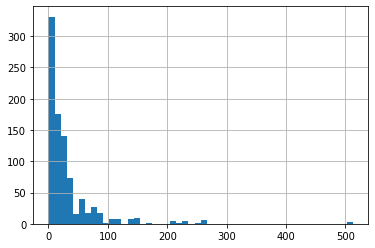

In [ ]:
# Plot the histogram of 'Fare' to notice the changes.
dataset.Fare.hist(bins=50)

## 6. Dealing with Categorical Values

Categorical data are variables that contain label values rather than numeric values. 

---

Since, machine learning models are based on Mathematical equations and you can intuitively understand that it would cause some problem if we can keep the Categorical data in the equations because we would only want numbers in the equations.

---

This means that categorical data must be converted to a numerical form.

**Identifying Categorical Data: Nominal, Ordinal and Continuous**

+ Nominal features  are features where the categories are only labeled without any order of precedence. In this dataset, the feature 'Sex' is a nominal feature.

+ Ordinal features are features having some order associated with them. For example, a feature like Pclass, with three categories: first, second and third, which have an order associated with them.

+  Continuous features are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time.


**Encoding Categorical Data**

The techniques that will be covered are the following:

+ Replacing values
+ Encoding labels
+ One-Hot encoding

In [ ]:
######################## Replacing values ##########################
# replacing the categories with the desired numbers. 
# This can be achieved with the help of the replace() function in pandas
replace_map  = {"third":0,"second":1,"first":2}
dataset.Pclass=dataset["Pclass"].replace(replace_map)
dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,0,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,0,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,2,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,2,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
dataset.Pclass.unique()

array([0, 2, 1])

In [ ]:
######################### label encoding ###########################
# converting each value in a column to a number. Numerical labels are always between 0 and n_categories-1.
dataset.Sex=dataset.Sex.astype('category').cat.codes


In [ ]:
dataset.Sex.unique()

array([1, 0], dtype=int8)

In [ ]:
######################### One-Hot encoding ###########################
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. 
# This has the benefit of not weighting a value improperly.
dataset=pd.get_dummies(data=dataset,columns=['Embarked'])

In [ ]:
#print the new dataset
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1,0,0
2,3,1,0,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0,0,1
4,5,0,0,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0,0,1
887,888,1,2,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0,0,1
888,889,0,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,2,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1,0,0


# 7. Rescaling

### **What is Feature Scaling ?**

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds.

### **Why Scaling?**

Most of the times, the dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

### **How to Scale Features**

There are four common methods to perform Feature Scaling.

**1. Standardisation:**

Standardisation replaces the values by their Z scores.

![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*LysCPCvg0AzQenGoarL_hQ.png)


This redistributes the features with their mean μ = 0 and standard deviation σ =1 . sklearn.preprocessing.scale helps us implementing standardisation in python.

**2. Mean Normalisation:**

![Texte alternatif…](https://cdn-images-1.medium.com/max/2000/1*fyK4gMQrfJKV5pmbXSrNbg.png)


This distribution will have values between -1 and 1with μ=0.

Standardisation and Mean Normalization can be used for algorithms that assumes zero centric data like Principal Component Analysis(PCA).

**3. Min-Max Scaling:**

![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*19hq_t_NFQ6YVxMxsT0Cqg.png)


This scaling brings the value between 0 and 1.

**4. Unit Vector:**


![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*u2Up0eaer56dpmaElU3Zxw.png)


Scaling is done considering the whole feature vecture to be of unit length.

Min-Max Scaling and Unit Vector techniques produces values of range [0,1]. When dealing with features with hard boundaries this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.





In [ ]:
###############################################################
#       Step 6 : Feature Scaling                              #
###############################################################

# from the package sklearn.preprocessing import standard scaler
from sklearn.preprocessing import StandardScaler 

sc_dataset = StandardScaler()

# We need to fit and transform the dataset
scaled_dataset = sc_dataset.fit_transform(dataset[['Age','Fare']])

# Print the scaled dataset 
scaled_dataset

array([[-0.5924806 , -0.50607007],
       [ 0.63878901,  0.78734055],
       [-0.2846632 , -0.49243572],
       ...,
       [ 0.        , -0.17884577],
       [-0.2846632 , -0.04654211],
       [ 0.17706291, -0.49597055]])

Now the all the data are in same scale. We can now split it.

# 8. **Data Spliting**


In any Machine Learning model is that we’re going to split data-set into two separate sets

#### 1. Training Set

#### 2. Test Set

### Why we need splitting ?

Well here it’s your algorithm model that is going to learn from your data to make predictions. Generally we split the data-set into 70:30 ratio or 80:20 what does it mean? 70 percent data is used in train and 30 percent data used in test. However, this splitting can be varied according to the data-set shape and size.

In [ ]:
###############################################################
#       Step 7 : Splitting the dataset                        #
###############################################################

from sklearn.model_selection import train_test_split

# Independent variables
X = dataset.drop('Survived',axis=1)

# Dependent variable
# Take all rows
# Take the column 'Survived'
Y = dataset.Survived

# The test size is taken as 20% of the total dataset i.e., out of 15 only 3 rows are taken as test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
# Print the X
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [ ]:
# Print the Y
Y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64